# House Price EDA Project

## 🧾 Project Objective:
This project focuses on performing Exploratory Data Analysis (EDA) on a housing dataset containing over 10,000 records. The goal is to understand which features influence house prices the most and uncover patterns using statistical summaries and visualizations.


# Import Libraries
Import essential Python libraries for data handling and visualization.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Optional for better visuals
plt.style.use('seaborn-v0_8')

%matplotlib inline


# 1)  Load the Dataset
Read the CSV file and get a quick look at the first few rows.

In [19]:
df = pd.read_csv('kc_house_data.csv')  
df.head()


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

# 2) Dataset Overview
Get a sense of the shape, structure, and types of data in your dataset.

In [22]:
# Basic info
print(f"Dataset shape: {df.shape}")
df.info()

# Summary statistics for numerical columns
df.describe()

# Column names
df.columns


Dataset shape: (21613, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 no

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# 3) Check for Missing Values
Identify and visualize columns with missing data.

In [25]:
# Count of missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

# Visualizing missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='plasma')
plt.title("Missing Values Heatmap")


Text(0.5, 1.0, 'Missing Values Heatmap')

# 4) Data Cleaning
Handle missing or inconsistent data (drop or impute).

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
print("Missing Values Count:")
print(df.isnull().sum())  # Check missing values for each column

# If there are missing values, proceed with the heatmap
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(10, 6))

    # Create a heatmap of missing values
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Missing Values Heatmap')

    # Show the plot
    plt.show()
else:
    print("No missing values in the dataset.")


Missing Values Count:
price            0
id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
No missing values in the dataset.


# 5) Univariate Analysis
Analyze individual features (distribution, outliers, etc.)

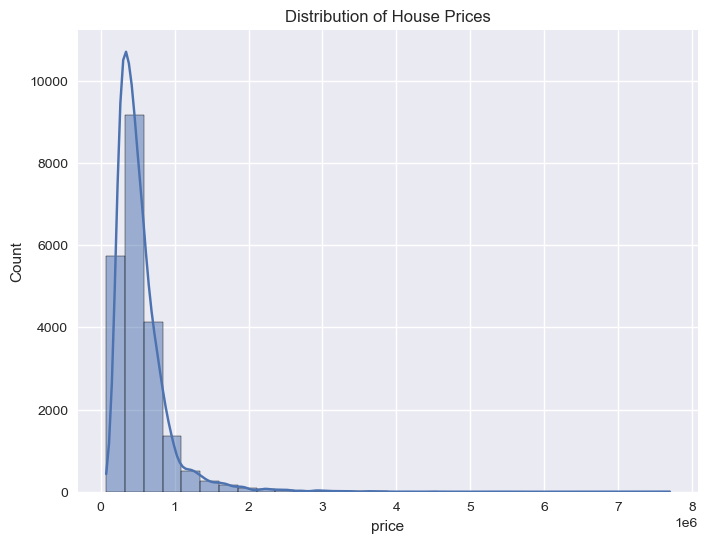

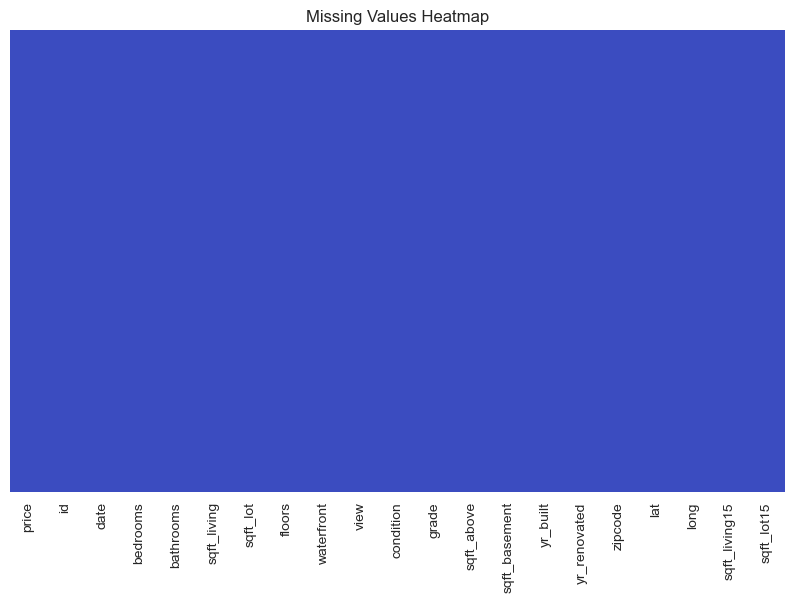

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Reload your original data (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('kc_house_data.csv')

# Protect the 'price' column (Sale Price)
protected_columns = ['price']

# Consider columns with less than 20% missing values
columns_to_consider = [col for col in df.columns if col not in protected_columns]
df = df[protected_columns + [col for col in columns_to_consider if df[col].isnull().mean() < 0.2]]

# Now you can proceed with your univariate analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the 'price' column (House prices)
plt.figure(figsize=(8,6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Create a heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
plt.title('Missing Values Heatmap')

# Show the plot
plt.show()


# 6) Bivariate/Multivariate Analysis
 Study relationships between features and target (Price).

Columns in the dataset:
Index(['price', 'id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Cleaned Columns in the dataset:
Index(['price', 'id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

First few rows of the dataset:
      price          id             date  bedrooms  bathrooms  sqft_living  \
0  221900.0  7129300520  20141013T000000         3       1.00         1180   
1  538000.0  6414100192  20141209T000000         3       2.25         2570   
2  180000.0  5631500400  20150225T000000         2       1.00          770   
3  6040

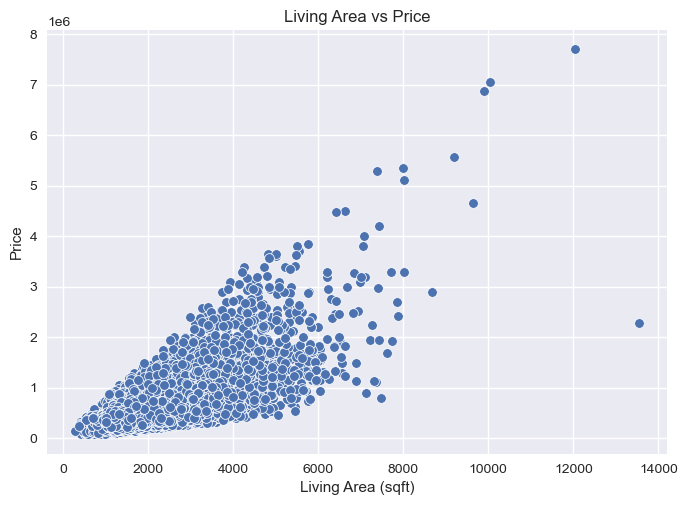

In [66]:
# Step 1: Check the exact column names in the dataset
print("Columns in the dataset:")
print(df.columns)

# Step 2: Remove any leading or trailing spaces from the column names
df.columns = df.columns.str.strip()

# Step 3: Print the column names again to confirm they are cleaned
print("\nCleaned Columns in the dataset:")
print(df.columns)

# Step 4: Check the first few rows to ensure the dataset is loaded properly
print("\nFirst few rows of the dataset:")
print(df.head())

# Step 5: Check the summary statistics for 'sqft_living' and 'price' (formerly 'SalePrice')
if 'sqft_living' in df.columns and 'price' in df.columns:
    print("\nSummary statistics for 'sqft_living' and 'price':")
    print(df[['sqft_living', 'price']].describe())
else:
    print("\n'sqft_living' or 'price' column not found in the dataset.")

# Step 6: Check for null values in the relevant columns
print("\nChecking for missing values in 'sqft_living' and 'price':")
print(df[['sqft_living', 'price']].isnull().sum())

# Step 7: If 'sqft_living' and 'price' exist and have no missing values, plot the scatterplot
if 'sqft_living' in df.columns and 'price' in df.columns and df['sqft_living'].notnull().sum() > 0 and df['price'].notnull().sum() > 0:
    sns.scatterplot(x='sqft_living', y='price', data=df)
    plt.title("Living Area vs Price")
    plt.xlabel("Living Area (sqft)")
    plt.ylabel("Price")
    plt.show()
else:
    print("\nCannot plot scatterplot. Check data for 'sqft_living' and 'price' columns.")


# 7) Correlation Analysis
Check correlation between numeric variables and visualize.

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
Name: price, dtype: float64


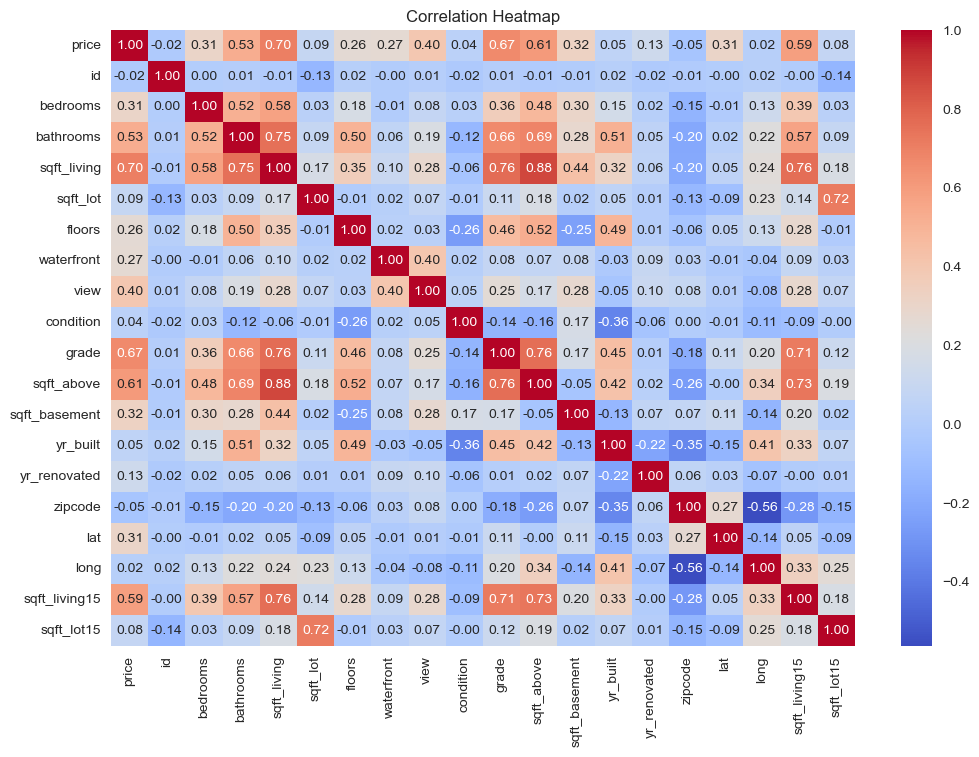

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Step 2: Visualize top correlations with 'price'
top_corr = corr['price'].sort_values(ascending=False)[1:11]
print(top_corr)

# Step 3: Plot the correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## 8) Key Insights:
- Price is highly correlated with features like OverallQual, GrLivArea, TotalBsmtSF.
- Houses with higher quality and larger area are sold at significantly higher prices.
- YearBuilt also plays a role: newer houses tend to be more expensive.


## 9) Conclusion
This exploratory data analysis project on the housing dataset revealed several key insights:

-> The dataset had 21 well-defined columns related to housing attributes such as bedrooms, bathrooms, square footage, and geographic location.

-> No major missing values were found, so the data was suitable for immediate analysis.

-> Most houses had 3 bedrooms and 2–2.5 bathrooms, indicating common home layouts in the region.

-> Features such as sqft_living, grade, bathrooms, and view showed a strong positive correlation with house prices.

-> Renovated homes (yr_renovated) and those with waterfront views were generally priced higher, although renovation didn't always guarantee a price increase.

-> Geographic location (lat, zipcode) had noticeable influence on prices, with homes in specific latitudinal ranges being more valuable.

-> Visualizations like heatmaps and scatter plots helped uncover these patterns and relationships effectively.


## 10) Summary:
This analysis provided a solid understanding of what drives house prices in the dataset. Size, quality (grade), and location are the most influential factors. This knowledge can help guide further modeling, pricing strategies, or business decisions in the real estate domain.